In [182]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
######################importing modules from tensorflow#####################################
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

############################################################################################
path='C://Users//bishal.ghimire//Desktop//data//loadValues.csv'


In [183]:
class DataImport():
    
    def __init__(self,path):
        self.path=path
        self.get_data()
        #self.remove_rstrip()
        self.date_time_format('Time')
       
        pass
    def get_data(self):#reads csv file 
        self.data= pd.read_csv(self.path)
        
    def date_time_format(self,index): #changes a column of a pandas dataframe to date-time format, takes column index as input
        self.data[index]=pd.to_datetime(self.data[index])



In [184]:
class preprocessing():
    
    def __init__(self,pandas_df):
        self.data=pandas_df
        self.interpol()
        self.take_abs()
        self.scaling()
        self.give_parameter()
        pass
    
    def interpol(self):
        self.data=self.data.interpolate(method='linear')
    def take_abs(self):
        self.data['Consumption']=self.data['Consumption'].abs()
        pass
    def scaling(self):
        self.data['Consumption']=self.data['Consumption']/max(self.data['Consumption'])
    def give_parameter(self):
        print(self.data['Consumption'].describe())

    

In [185]:
temp0=DataImport(path)
temp1=preprocessing(temp0.data)
df=temp1.data

count    105408.000000
mean          0.027990
std           0.046480
min           0.000000
25%           0.012007
50%           0.017920
75%           0.025818
max           1.000000
Name: Consumption, dtype: float64


In [186]:
class LSTMDataPreprocessing():
    def __init__(self,df):
        self.df=df
        self.window_size=5
        self.source=[] #source=every five(window size) consucative  consumptions data
        self.target=[]# target=every 6th(window size+1) concumption data
        self.Sorce_Target()
        self.Train_Test_Validate()
        pass
    def Sorce_Target(self):#converts the pandas dataframe to numpy format serigates the source and target data
        #changing the pandas dataframe to numpy format
        df_numpy=self.df.to_numpy()
        
        for i in range (len(df_numpy)-self.window_size):
            row = [[a] for a in df_numpy[i:i+self.window_size]]
            self.source.append(row)
            label = df_numpy[i+self.window_size]
            self.target.append(label)
        self.source=np.array(self.source)
        self.target=np.array(self.target)
        
        pass
    def Train_Test_Validate(self):#splitting data into test train and validate 
        self.train_source=self.source[:int(len(self.source)*0.6)]
        self.train_target=self.target[:int(len(self.target)*0.6)]
        self.val_source=self.source[int(len(self.source)*0.6):int(len(self.source)*0.8)]
        self.val_target=self.target[int(len(self.target)*0.6):int(len(self.target)*0.8)]
        self.test_source=self.source[int(len(self.source)*0.8):]
        self.test_target=self.target[int(len(self.target)*0.8):]
    

In [187]:
temp2=LSTMDataPreprocessing(temp1.data['Consumption'])

In [194]:
print(len(temp2.train_source))
print(len(temp2.val_source))
print(len(temp2.test_source))
print(len(temp2.source))

63241
21081
21081
105403


In [189]:
class LSTMModel():
    def __init__(self,train_source,train_target,test_source,test_target,validate_source,validate_target):
        self.train_source=train_source
        self.train_target=train_target
        self.test_source=test_source
        self.test_target=test_target
        self.validate_source=validate_source
        self.validate_target=validate_target
        self.create_model()
        self.train_model()
    
    def create_model(self):
        self.model1 = Sequential()
        self.model1.add(InputLayer((5, 1)))
        self.model1.add(LSTM(64))
        self.model1.add(Dense(8, 'relu'))
        self.model1.add(Dense(1, 'linear'))
        self.model1.summary()
        self.cp1 = ModelCheckpoint('model1/', save_best_only=True)
        self.model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
        

    def train_model(self): 
        self.model1.fit(self.train_source, self.train_target, validation_data=(self.validate_source,self.validate_target), epochs=10, callbacks=[self.cp1])
        pass
   

    


In [190]:
mod=LSTMModel(temp2.train_source,temp2.train_target,temp2.test_source,temp2.test_target,temp2.val_source,temp2.val_target)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 64)                16896     
                                                                 
 dense_18 (Dense)            (None, 8)                 520       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1960/1977 [============================>.] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0322

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1977/1977 [==============================] - 9s 4ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0441
Epoch 2/10
1973/1977 [============================>.] - ETA: 0s - loss: 8.8684e-04 - root_mean_squared_error: 0.0298

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1977/1977 [==============================] - 9s 5ms/step - loss: 8.8672e-04 - root_mean_squared_error: 0.0298 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0420
Epoch 3/10
1970/1977 [============================>.] - ETA: 0s - loss: 8.2061e-04 - root_mean_squared_error: 0.0286

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1977/1977 [==============================] - 10s 5ms/step - loss: 8.2049e-04 - root_mean_squared_error: 0.0286 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0410
Epoch 4/10
1977/1977 [==============================] - 7s 4ms/step - loss: 7.8653e-04 - root_mean_squared_error: 0.0280 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0414
Epoch 5/10
1972/1977 [============================>.] - ETA: 0s - loss: 7.7118e-04 - root_mean_squared_error: 0.0278

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1977/1977 [==============================] - 10s 5ms/step - loss: 7.7032e-04 - root_mean_squared_error: 0.0278 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0409
Epoch 6/10
1977/1977 [==============================] - 8s 4ms/step - loss: 7.5735e-04 - root_mean_squared_error: 0.0275 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0409
Epoch 7/10
1977/1977 [==============================] - 7s 3ms/step - loss: 7.5237e-04 - root_mean_squared_error: 0.0274 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0413
Epoch 8/10
1977/1977 [==============================] - 7s 4ms/step - loss: 7.4729e-04 - root_mean_squared_error: 0.0273 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0412
Epoch 9/10
1977/1977 [==============================] - 7s 4ms/step - loss: 7.4081e-04 - root_mean_squared_error: 0.0272 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0412
Epoch 10/10
1967/1977 [============================>.] - ETA: 0s - loss: 7.3603e-04 - root_mean_squared_error: 0.0271

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1977/1977 [==============================] - 11s 5ms/step - loss: 7.3479e-04 - root_mean_squared_error: 0.0271 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0409


In [191]:
class LSTMPredict():
    def __init__(self,train_source,train_target,test_source,test_target,validate_source,validate_target):
        self.train_source=train_source
        self.train_source=train_source
        self.train_target=train_target
        self.test_source=test_source
        self.test_target=test_target
        self.validate_source=validate_source
        self.validate_target=validate_target
        self.prediction()
   
        pass
    def prediction(self):
        model1 = load_model('model1/') 
        train_predictions = model1.predict(self.train_source).flatten()
        train_results = pd.DataFrame(data={'Train Predictions':train_predictions})
        
        print('From train data')
        print( train_results)
        plt.plot(train_results['Train Predictions'][50:500])
        plt.plot(temp1.data['Consumption'][50:500])
        plt.show()
        
        print('from Validation data')
        model1 = load_model('model1/') 
        train_predictions = model1.predict(self.validate_source).flatten()
        valid_data=pd.DataFrame(data={'Predictions':train_predictions,'actual':self.validate_target})
        print( valid_data)
        plt.plot(valid_data['Predictions'][50:500])
        plt.plot(valid_data['actual'][50:500])
        plt.show()
        
        
        print('From Test Data')
        model1 = load_model('model1/') 
        train_predictions = model1.predict(self.test_source).flatten()
        valid_data=pd.DataFrame(data={'Predictions':train_predictions,'actual':self.test_target})
        print( valid_data)
        plt.plot(valid_data['Predictions'][50:500])
        plt.plot(valid_data['actual'][50:500])
        
      
    
        

1977/1977 [==============================] - 3s 1ms/step
From train data
       Train Predictions
0               0.016673
1               0.023590
2               0.024138
3               0.017873
4               0.014862
...                  ...
63236           0.019301
63237           0.022295
63238           0.014911
63239           0.014856
63240           0.017718

[63241 rows x 1 columns]


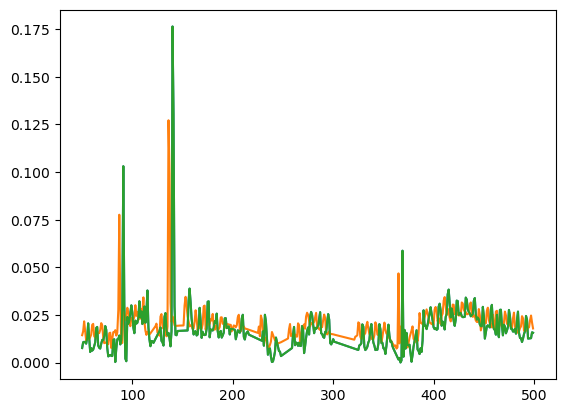

from Validation data
659/659 [==============================] - 1s 2ms/step
       Predictions    actual
0         0.023993  0.030696
1         0.028594  0.031314
2         0.029217  0.022471
3         0.023617  0.005526
4         0.012499  0.002590
...            ...       ...
21076     0.014477  0.010442
21077     0.014877  0.020401
21078     0.021592  0.024924
21079     0.024692  0.026990
21080     0.026146  0.021227

[21081 rows x 2 columns]


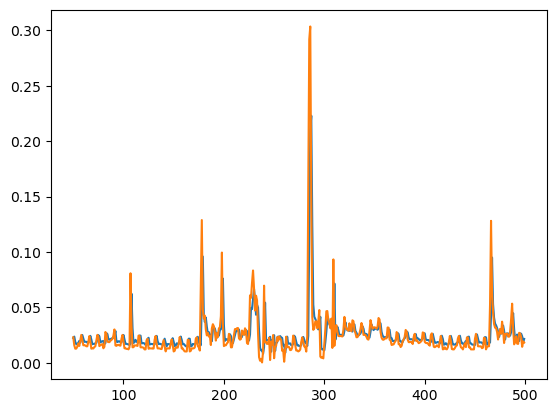

From Test Data
659/659 [==============================] - 1s 1ms/step
       Predictions    actual
0         0.022521  0.021202
1         0.022775  0.018471
2         0.021086  0.016981
3         0.019994  0.018178
4         0.020604  0.019911
...            ...       ...
21076     0.026980  0.026788
21077     0.026903  0.027888
21078     0.027914  0.027261
21079     0.027395  0.026442
21080     0.026620  0.024905

[21081 rows x 2 columns]


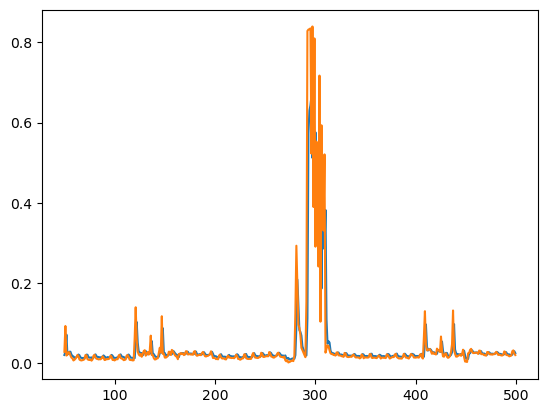

In [192]:
plt.plot(temp1.data['Consumption'][50:500])
LSTMPredict(temp2.train_source,temp2.train_target,temp2.test_source,temp2.test_target,temp2.val_source,temp2.val_target)



In [ ]:
class Bayesian():
    
    def __init__(self):
        import fbprophet
        from fbprophet import Prophet
        pass
    